In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
from jqdatasdk import *
import numpy as np
import talib as tl #技术指标
import datetime as dt
auth('15652961415','715905Si')
#sns.set_style('darkgrid')
plt.rcParams['font.sans-serif']=['SimHei']
path_base = 'C:/wangxiaolei/quant/Rong360-master/hongguan/'
#-*- coding: utf-8 -*-

auth success 


In [2]:
def show_index_hs(df_index, df_hs, label):
    fig = plt.figure(figsize=(15,6))
    x_index = df_hs.index
    ax1 = fig.add_subplot(111)
    ax1.plot(df_index,color = 'black', linewidth=2, label=label)
    ax1.legend(loc=2,fontsize=12)
    ax2=ax1.twinx()#这是双坐标关键一步
    ax2.plot(df_hs['close'], color = 'red',linewidth=2,label='沪深300指数')
    ax2.legend(loc=1,fontsize=12)
    # ax1.grid(False)
    ax2.grid(False)
    plt.show()
def show_benifit(df, label):
    x_index = df.index
    plt.figure(figsize=(12,6))
    plt.plot(x_index, df['benchmark'], color='black', label='benchmark')
    plt.plot(x_index, df['net_value'], color='red', label='net_value')
    plt.axhline(0,ls='--')
    plt.title(label)
    plt.xlabel('日期')
    plt.ylabel('收益')
    plt.legend()
rate_riskfree = 0.0 #无风险收益

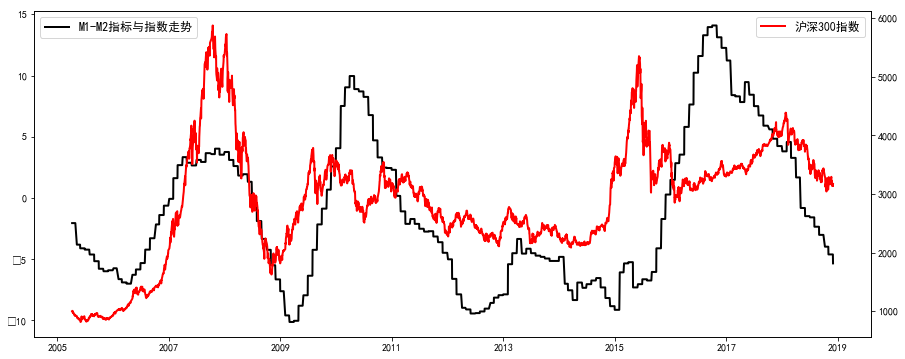

In [49]:
#四、货币充足率
#获取企业债和国债利差数据
path_xy = path_base + 'xindai.xls'
df_xd = pd.read_excel(path_xy, sheet_name = [0])[0]
df_xd.set_index('日期', inplace = True)
df_xd.fillna(method='ffill', inplace = True)
df_xd['xd_M1-M2'] = df_xd[df_xd.columns[1]] - df_xd[df_xd.columns[2]]
df_xd['xd_M1-M2'] = df_xd['xd_M1-M2'].rolling(3).mean()
df_hs =  get_price('000300.XSHG',start_date = df_xd.index[0], end_date = df_xd.index[-1],fields='close').dropna()
df_xd_copy = df_xd[df_xd.index > df_hs.index[0]]
index_list = df_xd.index.tolist()
df_xd = df_xd[index_list.index(df_xd_copy.index[0]) - 1:]
index_date  = pd.date_range(df_xd.index[0], df_xd.index[-1])
df_xd = df_xd.reindex(index_date).fillna(method = 'ffill').reindex(df_hs.index).fillna(method = 'ffill')
#df_xd = df_xd.reindex(df_hs.index).fillna(method = 'ffill')
show_index_hs(df_xd['xd_M1-M2'], df_hs, 'M1-M2指标与指数走势')

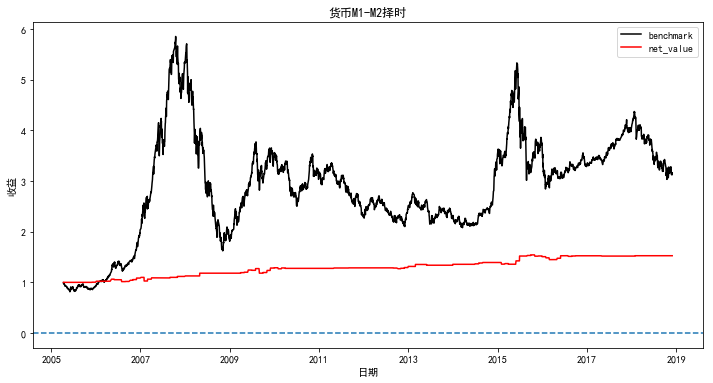

In [53]:
df_xd['xd_M1-M2_shift'] = df_xd['xd_M1-M2'].shift(1)
df_xd['signal'] = (df_xd['xd_M1-M2'] > df_xd['xd_M1-M2_shift']) * 1
df_hs['pct'] = df_hs['close'].pct_change()
df_hs['benchmark'] = (df_hs['pct'] + 1).cumprod()
df_hs['net_value'] = (df_hs['pct'] * df_xd['signal'] + rate_riskfree * (1 - df_xd['signal']) + 1).cumprod()
show_benifit(df_hs,'货币M1-M2择时')

In [50]:
df_hs.shape

(3321, 1)

In [51]:
df_xd.shape

(3321, 4)

In [54]:
df_xd[df_xd['signal'] > 0]

,社会融资规模:当月值,M1:同比,M2:同比,xd_M1-M2,xd_M1-M2_shift,signal
2005-11-30,2368.00,12.70,18.30,-5.930000,-6.010000,1
2006-01-04,2524.00,11.78,17.57,-5.766667,-5.930000,1
2006-05-08,3325.00,12.50,18.90,-6.300000,-7.026667,1
2006-05-31,3785.00,14.01,19.10,-5.863333,-6.300000,1
2006-06-30,3843.00,13.90,18.43,-5.340000,-5.863333,1
2006-07-31,2254.00,15.30,18.40,-4.240000,-5.340000,1
2006-08-31,3362.00,15.60,17.90,-3.310000,-4.240000,1
2006-10-09,3077.00,15.70,16.83,-2.176667,-3.310000,1
2006-10-31,894.00,16.30,17.10,-1.410000,-2.176667,1
2006-11-30,2788.00,16.80,16.80,-0.643333,-1.410000,1
